### Explore processed pan-cancer data

In [1]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import mpmp.config as cfg
import mpmp.utilities.data_utilities as du

In [2]:
# load mutation info
print('Loading gene label data...', file=sys.stderr)
genes_df = du.load_top_50()
sample_info_df = du.load_sample_info(verbose=True)

# this returns a tuple of dataframes, unpack it below
pancancer_data = du.load_pancancer_data(verbose=True)
(sample_freeze_df,
 mutation_df,
 copy_loss_df,
 copy_gain_df,
 mut_burden_df) = pancancer_data

Loading gene label data...
Loading sample info...
Loading pan-cancer data from cached pickle file...


In [3]:
# load expression data
rnaseq_df = du.load_expression_data(verbose=True)

# standardize columns of expression dataframe
print('Standardizing columns of expression data...', file=sys.stderr)
rnaseq_df[rnaseq_df.columns] = StandardScaler().fit_transform(rnaseq_df[rnaseq_df.columns])

print(rnaseq_df.shape)
rnaseq_df.iloc[:5, :5]

Loading gene expression data...
Standardizing columns of expression data...


(11060, 15369)


,1,100,1000,10000,10001
sample_id,,,,,
TCGA-02-0047-01,-0.144025,-0.206544,1.029891,0.643947,-0.730368
TCGA-02-0055-01,-0.124850,-0.132174,0.689587,0.153994,-0.406662
TCGA-02-2483-01,-0.133468,-0.102772,1.448180,0.668630,0.498391
TCGA-02-2485-01,-0.146976,-0.212598,4.340760,11.504372,0.240748
TCGA-02-2486-01,-0.145246,-0.146875,0.994442,0.116970,0.386085


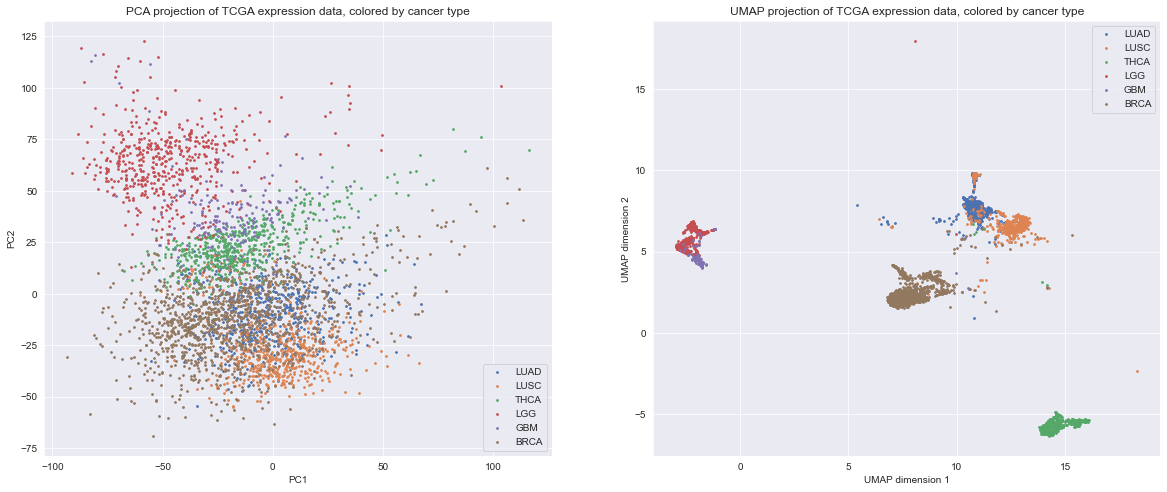

In [4]:
from sklearn.decomposition import PCA
from umap import UMAP

sns.set({'figure.figsize': (20, 8)})
fig, axarr = plt.subplots(1, 2)

assert sample_info_df.index.equals(rnaseq_df.index)

pca = PCA(n_components=2)
X_proj_pca = pca.fit_transform(rnaseq_df)
reducer = UMAP()
X_proj_umap = reducer.fit_transform(rnaseq_df)

enum_samples_df = sample_info_df.reset_index()
# rnaseq_cancer_types = sorted(sample_info_df.cancer_type.unique())
rnaseq_cancer_types = ['LUAD', 'LUSC', 'THCA', 'LGG', 'GBM', 'BRCA']
for i, cancer_type in enumerate(rnaseq_cancer_types):
    ixs = enum_samples_df.index[enum_samples_df['cancer_type'] == cancer_type].tolist()
    axarr[0].scatter(X_proj_pca[ixs, 0], X_proj_pca[ixs, 1], label=cancer_type, s=3)
    axarr[1].scatter(X_proj_umap[ixs, 0], X_proj_umap[ixs, 1], label=cancer_type, s=3)
    
axarr[0].set_xlabel('PC1')
axarr[0].set_ylabel('PC2')
axarr[0].set_title('PCA projection of TCGA expression data, colored by cancer type')
axarr[0].legend()
axarr[1].set_xlabel('UMAP dimension 1')
axarr[1].set_ylabel('UMAP dimension 2')
axarr[1].set_title('UMAP projection of TCGA expression data, colored by cancer type')
axarr[1].legend()

In [6]:
# load expression data
methylation_df = du.load_methylation_data(verbose=True)

# standardize columns of methylation dataframe
print('Standardizing columns of methylation data...', file=sys.stderr)
methylation_df[methylation_df.columns] = StandardScaler().fit_transform(
    methylation_df[methylation_df.columns])

print(methylation_df.shape)
methylation_df.iloc[:5, :5]

Loading DNA methylation data...
Standardizing columns of methylation data...


(11985, 11882)


,cg00005847,cg00008493,cg00012199,cg00012386,cg00012792
sample_id,,,,,
TCGA-01-0628-11,-0.016860,0.537338,-0.163379,-1.192034,-2.390579
TCGA-01-0630-11,0.191661,0.630163,-0.120939,-1.444241,-2.158870
TCGA-01-0631-11,-0.555866,0.704423,-0.160726,-1.416827,-2.412133
TCGA-01-0633-11,-0.610946,0.648728,-0.091762,-0.978206,-2.530682
TCGA-01-0636-11,0.482803,0.685858,-0.102372,-1.323620,-2.751614
